<a href="https://colab.research.google.com/github/23117129/PYTORCH/blob/main/Dai_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [168]:
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [169]:
df = pd.read_csv('tips.csv')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [170]:
X= df.drop('tip', axis=1) # These are the features

y = df['tip'] # This target variable

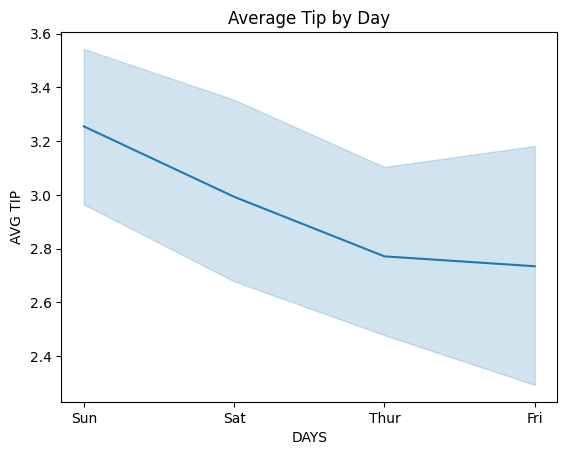

In [171]:
sns.lineplot(data=df, x="day", y="tip", estimator="mean")
plt.xlabel("DAYS")
plt.ylabel("AVG TIP")
plt.title("Average Tip by Day")
plt.show()

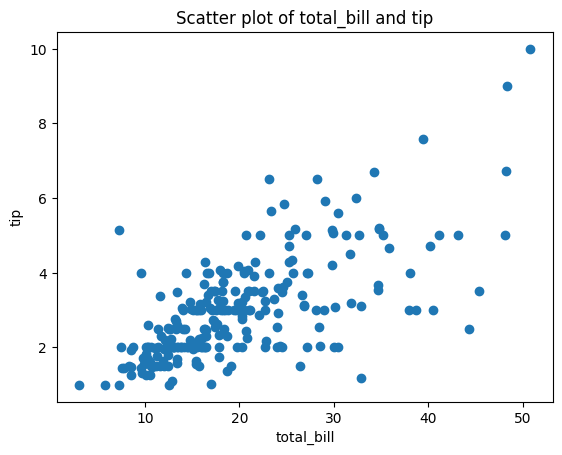

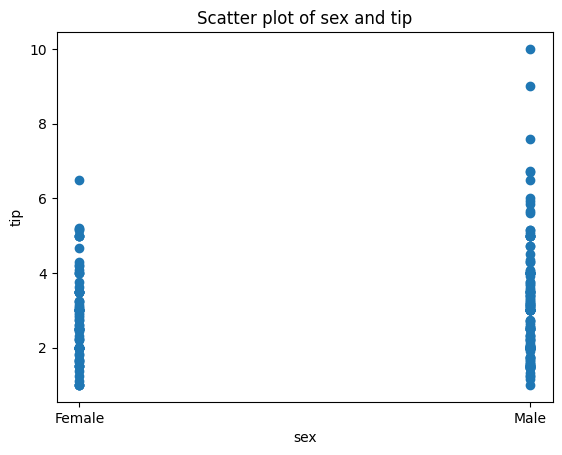

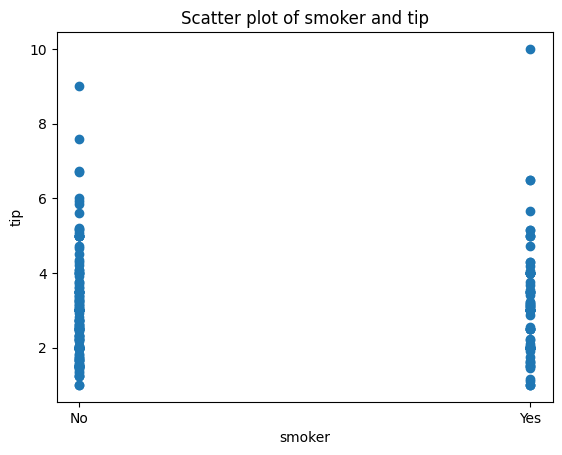

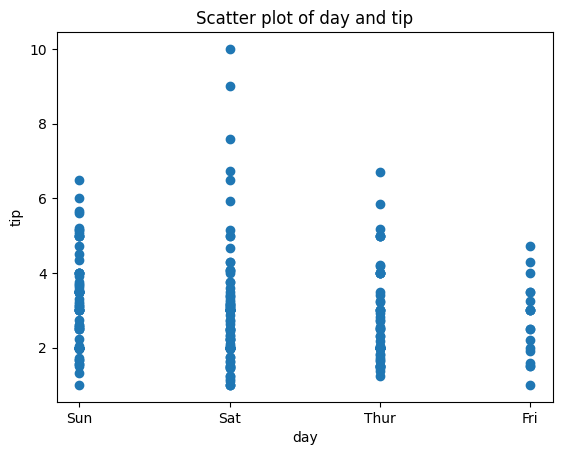

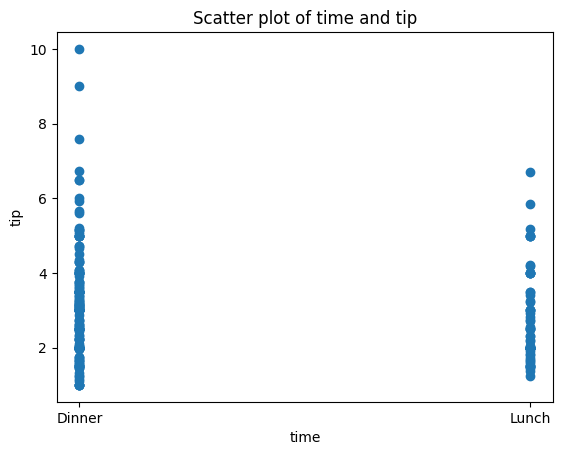

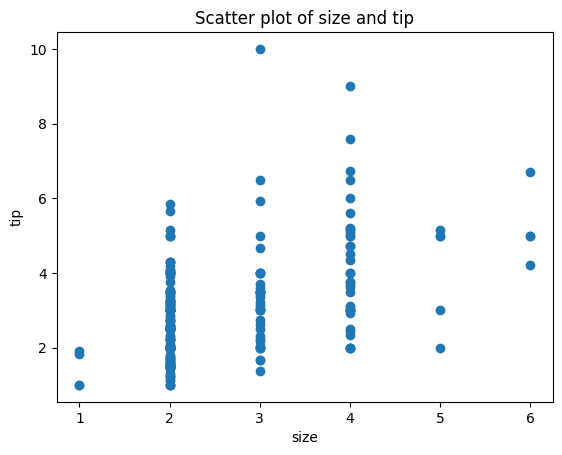

In [172]:
for i in X.columns:
  plt.scatter(X[i], y)
  plt.xlabel(i)
  plt.ylabel('tip')
  plt.title(f'Scatter plot of {i} and tip')
  plt.show()





# Relation among target and Featurers
1. We notice that tip amount is more if total bill is more
2. Male will give more tip than Female
3. No much differnce in smokers and non smokers for giving tip
4. On sunday tip amount is more and least on Friday
5. Dinner time is prefer for more tip


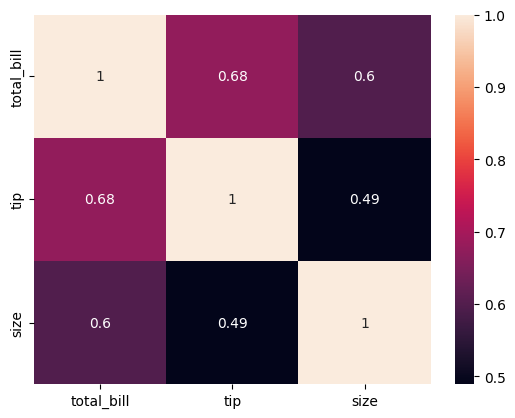

In [173]:
# Heat Map(correlation)
df_corr = df[['total_bill', 'tip' , 'size']]
sns.heatmap(df_corr.corr(), annot=True)
plt.show()


More correlation found among tip and total bill


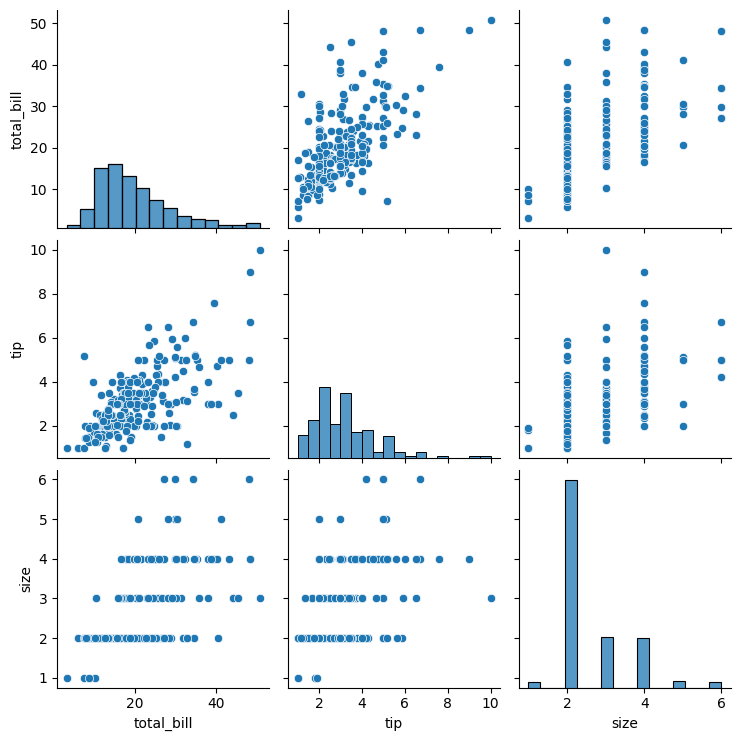

In [174]:
# We use the pairplot
sns.pairplot(df)
plt.show()

In [175]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
X['sex'] = label_encoder.fit_transform(df['sex']).copy()

X['smoker'] = label_encoder.fit_transform(df['smoker']).copy()
X['day'] = label_encoder.fit_transform(df['day']).copy()
X['time'] = label_encoder.fit_transform(df['time']).copy()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [176]:
import statsmodels.api as sm


X = sm.add_constant(X)
# Fit the linear regression model
model = sm.OLS(y, X).fit()

In [177]:
from statsmodels.stats.diagnostic import linear_rainbow

# Perform the Rainbow test
test_stat, p_value = linear_rainbow(model)

print(f"Rainbow Test Statistic: {test_stat}")
print(f"P-value: {p_value}")

Rainbow Test Statistic: 1.2036274510126597
P-value: 0.15798464222013167


Since the P-value is greater than .05 so it accept null hypothesis and so model is linear

In [178]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score , mean_squared_error




X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = .25 , random_state =23)

R2_score 0.5066795931574788
MSE 0.9084829784718401
RMSE 0.9531437344240585


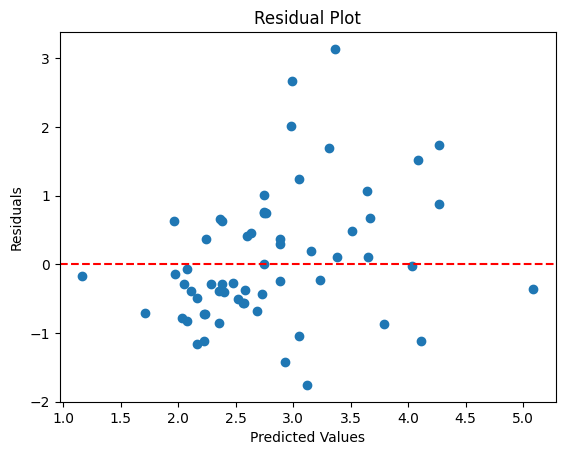

In [179]:
import numpy as np
LR = LinearRegression()
LR.fit(X_train , y_train)
y_pred =LR.predict(X_test)
print("R2_score" , r2_score(y_test , y_pred))
print("MSE" , mean_squared_error(y_test , y_pred))
print('RMSE' , np.sqrt(mean_squared_error(y_test , y_pred)))

# Residual Plot
residuals = y_test - y_pred

# Plot residuals
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()




# Residual Plot is plot after the model prediction


In [180]:
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train, y_train)

# Predictions
y_pred_ridge = ridge_reg.predict(X_test)

# Evaluation
print('Ridge Regression R2:', r2_score(y_test, y_pred_ridge))

Ridge Regression R2: 0.5097699116382306


In [181]:
lasso_reg = Lasso(alpha=0.01)
lasso_reg.fit(X_train, y_train)

# Predictions
y_pred_lasso = lasso_reg.predict(X_test)

# Evaluation
print('Lasso Regression R2:', r2_score(y_test, y_pred_lasso))

Lasso Regression R2: 0.5259777491486488


In [182]:
tree_reg = DecisionTreeRegressor(random_state=0)
tree_reg.fit(X_train, y_train)

# Predictions
y_pred_tree = tree_reg.predict(X_test)

# Evaluation
print('Decision Tree R2:', r2_score(y_test, y_pred_tree))

Decision Tree R2: 0.1755955345644662


In [183]:
forest_reg = RandomForestRegressor(n_estimators=100, random_state=0)
forest_reg.fit(X_train, y_train)

# Predictions
y_pred_forest = forest_reg.predict(X_test)

# Evaluation
print('Random Forest R2:', r2_score(y_test, y_pred_forest))

Random Forest R2: 0.4916738978834184


In [184]:
svr = SVR(kernel='linear')
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)


print('R2_score' , r2_score(y_test, y_pred_svr))

R2_score 0.507517060647249


In [185]:
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train, y_train)

# Predictions
y_pred_knn = knn_reg.predict(X_test)

# Evaluation
print('KNN Regression R2:', r2_score(y_test, y_pred_knn))

KNN Regression R2: 0.3355429976251788


Residuals of Rideg_reg
0.0696281589126542


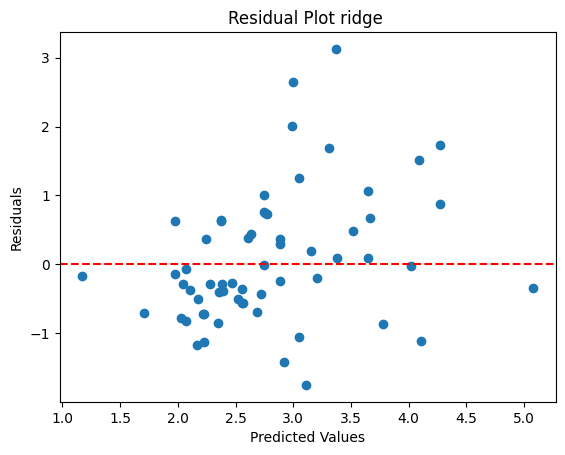


Residuals of Lasso_reg
0.07422304824730687


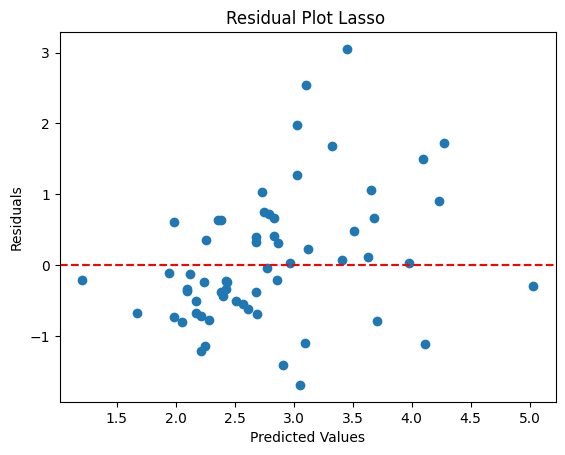

Residuals of Tree_reg
0.17442622950819667


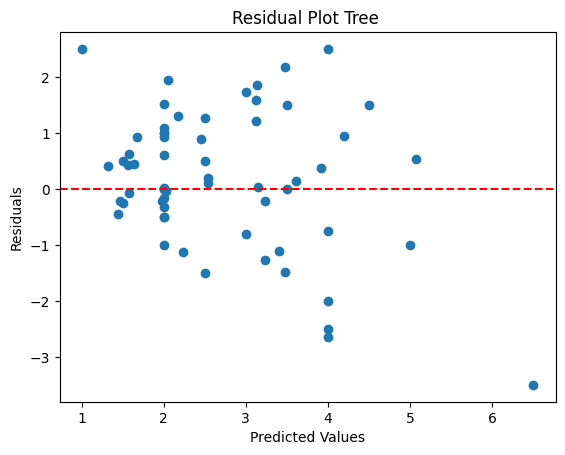

Residuals of Forest_reg
0.05286065573770499


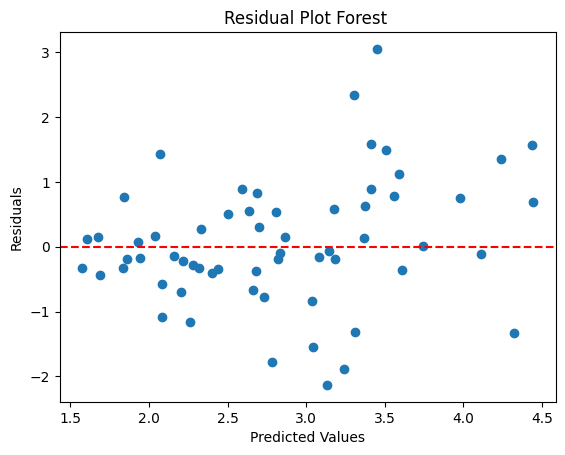

Residuals of SVR_reg
0.19192803251486554


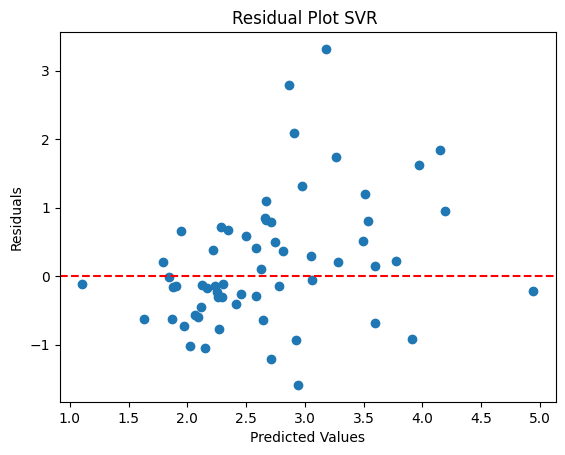

Residuals of KNN_reg
0.13180327868852457


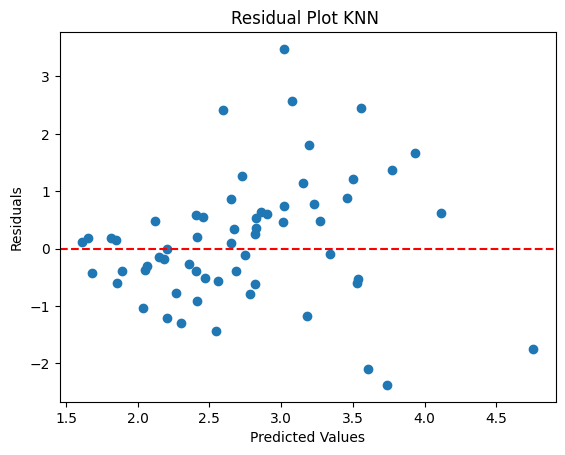

In [186]:
def residuals_plot(y_test, y_pred , name):
    residuals = y_test - y_pred
    print(np.mean(residuals))
    plt.scatter(y_pred, y=residuals)
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title(f'Residual Plot {name} ' )

    plt.show()


print('Residuals of Rideg_reg')
residuals_plot(y_test, y_pred_ridge , 'ridge')
print('')

print('Residuals of Lasso_reg')
residuals_plot(y_test, y_pred_lasso , 'Lasso')

print('Residuals of Tree_reg')
residuals_plot(y_test, y_pred_tree , 'Tree')

print('Residuals of Forest_reg')
residuals_plot(y_test, y_pred_forest , 'Forest')

print('Residuals of SVR_reg')
residuals_plot(y_test, y_pred_svr , 'SVR')

print('Residuals of KNN_reg')
residuals_plot(y_test, y_pred_knn , 'KNN')





Best Model is Lasso regression since it has highest R2 score


# Conclusion made for increase the Tip amount are follows as .
1. We notice that Sunday is busy day so to take more tip amount we increase more staff.
2. On Friday customers are less to increase customer some special discount should be given or some special type of food will serve .
3. Total bill means more tip so those customer have high bill give more better service quality  and send well trained staff members .

